In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import datetime

# analysis and modeling for paid channels != Email

In [2]:
path = r"D:\One Drive\OneDrive - Logicserve Digital Pvt Ltd\logicserve_data\data\tcp\ruk\aqua_euro_merge_data.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Date,Channel,New Users,Sessions,Budget_perday,Product
0,0,2019-04-01,Direct,48,48,0.0,Aquaguard
1,1,2019-04-01,Display,0,97,1353.0,Aquaguard
2,2,2019-04-01,Organic Search,24,48,0.0,Aquaguard
3,3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,4,2019-04-02,Display,724,917,12896.0,Aquaguard


In [5]:
df.Product.value_counts()

Aquaguard    6507
Euroclean    3283
Name: Product, dtype: int64

In [6]:
paid_channel = ["Paid Search", "Social", "Display","Email"]

In [7]:
df = df[df["Channel"].isin(paid_channel)]

In [8]:
df

,Unnamed: 0,Date,Channel,New Users,Sessions,Budget_perday,Product
1,1,2019-04-01,Display,0,97,1353.0,Aquaguard
3,3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,4,2019-04-02,Display,724,917,12896.0,Aquaguard
6,6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard
9,9,2019-04-03,Display,265,531,7462.0,Aquaguard
...,...,...,...,...,...,...,...
9782,3275,2022-05-29,Social,1960,2170,67783.0,Euroclean
9785,3278,2022-05-30,Paid Search,2252,3027,25548.0,Euroclean
9786,3279,2022-05-30,Social,1860,2124,66342.0,Euroclean
9788,3281,2022-05-31,Paid Search,3383,4049,34171.0,Euroclean


In [9]:
df.drop("Unnamed: 0", axis=1 , inplace =True)

In [10]:
df.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product
1,2019-04-01,Display,0,97,1353.0,Aquaguard
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,2019-04-02,Display,724,917,12896.0,Aquaguard
6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard
9,2019-04-03,Display,265,531,7462.0,Aquaguard


In [11]:
df.sort_values(by="Date", ascending=True)

,Date,Channel,New Users,Sessions,Budget_perday,Product
1,2019-04-01,Display,0,97,1353.0,Aquaguard
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,2019-04-02,Display,724,917,12896.0,Aquaguard
6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard
9,2019-04-03,Display,265,531,7462.0,Aquaguard
...,...,...,...,...,...,...
6505,2022-05-31,Paid Search,2679,3258,55698.0,Aquaguard
6506,2022-05-31,Social,386,241,15895.0,Aquaguard
6502,2022-05-31,Display,15928,23749,76974.0,Aquaguard
9788,2022-05-31,Paid Search,3383,4049,34171.0,Euroclean


In [12]:
df.shape

(5456, 6)

In [13]:
df["Channel"].value_counts()

Paid Search    1873
Social         1761
Display        1589
Email           233
Name: Channel, dtype: int64

In [14]:
import datetime

In [15]:
df["Date"] = pd.to_datetime(df["Date"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 1 to 9789
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5456 non-null   datetime64[ns]
 1   Channel        5456 non-null   object        
 2   New Users      5456 non-null   int64         
 3   Sessions       5456 non-null   int64         
 4   Budget_perday  5456 non-null   float64       
 5   Product        5456 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 298.4+ KB


In [17]:
df["year"] = df["Date"].dt.year

In [18]:
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [19]:
df

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1,2019-04-01,Display,0,97,1353.0,Aquaguard,2019,4,1
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
4,2019-04-02,Display,724,917,12896.0,Aquaguard,2019,4,2
6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
9,2019-04-03,Display,265,531,7462.0,Aquaguard,2019,4,3
...,...,...,...,...,...,...,...,...,...
9782,2022-05-29,Social,1960,2170,67783.0,Euroclean,2022,5,29
9785,2022-05-30,Paid Search,2252,3027,25548.0,Euroclean,2022,5,30
9786,2022-05-30,Social,1860,2124,66342.0,Euroclean,2022,5,30
9788,2022-05-31,Paid Search,3383,4049,34171.0,Euroclean,2022,5,31


In [20]:
df[(df["Channel"]=="Display") & (df["year"]==2019) & (df["month"]==4)]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1,2019-04-01,Display,0,97,1353.0,Aquaguard,2019,4,1
4,2019-04-02,Display,724,917,12896.0,Aquaguard,2019,4,2
9,2019-04-03,Display,265,531,7462.0,Aquaguard,2019,4,3
12,2019-04-04,Display,290,507,7137.0,Aquaguard,2019,4,4
16,2019-04-05,Display,3137,3862,54311.0,Aquaguard,2019,4,5
21,2019-04-06,Display,2462,3331,46824.0,Aquaguard,2019,4,6
26,2019-04-07,Display,893,1424,20032.0,Aquaguard,2019,4,7
30,2019-04-08,Display,821,1134,15951.0,Aquaguard,2019,4,8
33,2019-04-09,Display,893,1158,16276.0,Aquaguard,2019,4,9
36,2019-04-10,Display,1158,1689,23738.0,Aquaguard,2019,4,10


In [21]:
count = df.groupby(["Product","Channel","year","month"]).agg("count")

In [22]:
count.reset_index(inplace=True)

In [23]:
df[(df["Product"]=="Aquaguard") & (df["Channel"]=="Email") & (df["year"].isin([2021])) & (df["month"].isin([2,3,4,7,10]))]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
3824,2021-02-05,Email,24,48,1011230.0,Aquaguard,2021,2,5
4096,2021-03-21,Email,0,24,1132740.0,Aquaguard,2021,3,21
4301,2021-04-26,Email,24,24,1085760.0,Aquaguard,2021,4,26
4788,2021-07-20,Email,0,24,631910.0,Aquaguard,2021,7,20
5248,2021-10-07,Email,0,24,981000.0,Aquaguard,2021,10,7


In [24]:
df[df["Channel"].isin(paid_channel)].groupby("Channel").agg({"Budget_perday":["min","mean","median","max"],"Sessions":["min","mean","median","max"], "New Users":["min","mean","median","max"], "Product":"count"})

Budget_perday                                   Sessions  \
                      min          mean   median        max      min   
Channel                                                                
Display               0.0  53460.507867  25631.0   692935.0        0   
Email                 0.0  72220.751073  35678.0  1132740.0       24   
Paid Search           0.0  61057.065136  55249.0   361151.0       24   
Social                0.0  63421.106758  55175.0   502335.0        0   

                                        New Users                              \
                    mean  median    max       min         mean  median    max   
Channel                                                                         
Display      4354.535557  2486.0  36588         0  3235.940843  1760.0  30602   
Email         784.120172   699.0   4658         0   654.167382   580.0   3451   
Paid Search  2910.651895  2508.0  26828         0  2258.121730  1924.0  24275   
Social       1355.199886  1038.0   8434         0  1201.469052   903.0   7933   

            Product  
              count  
Channel              
Display        1589  
Email           233  
Paid Search    1873  
Social         1761

In [25]:
df[(df["Channel"]=="Email") & (df["Budget_perday"]==0)]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
2168,2020-06-04,Email,24,24,0.0,Aquaguard,2020,6,4
2175,2020-06-05,Email,314,314,0.0,Aquaguard,2020,6,5
2182,2020-06-06,Email,459,459,0.0,Aquaguard,2020,6,6
2188,2020-06-07,Email,1158,1158,0.0,Aquaguard,2020,6,7
2194,2020-06-08,Email,1496,1496,0.0,Aquaguard,2020,6,8
2201,2020-06-09,Email,265,265,0.0,Aquaguard,2020,6,9
2237,2020-06-16,Email,24,24,0.0,Aquaguard,2020,6,16
2243,2020-06-17,Email,48,48,0.0,Aquaguard,2020,6,17
2250,2020-06-18,Email,145,193,0.0,Aquaguard,2020,6,18
2256,2020-06-19,Email,314,314,0.0,Aquaguard,2020,6,19


In [26]:
df[(df["Channel"]=="Email") & (df["Budget_perday"]!=0)& (df["Date"]>="2022-01-01")]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
5762,2022-01-13,Email,24,24,407625.0,Aquaguard,2022,1,13
5901,2022-02-06,Email,0,24,36125.0,Aquaguard,2022,2,6
5950,2022-02-14,Email,0,24,36125.0,Aquaguard,2022,2,14
5957,2022-02-15,Email,0,24,36125.0,Aquaguard,2022,2,15
6080,2022-03-09,Email,0,24,56475.0,Aquaguard,2022,3,9


In [27]:
df[df["Channel"].isin(paid_channel)].groupby("Channel").agg({"Budget_perday":["min","mean","median","max"],"Sessions":["min","mean","median","max"], "New Users":["min","mean","median","max"], "Product":"count"})

Budget_perday                                   Sessions  \
                      min          mean   median        max      min   
Channel                                                                
Display               0.0  53460.507867  25631.0   692935.0        0   
Email                 0.0  72220.751073  35678.0  1132740.0       24   
Paid Search           0.0  61057.065136  55249.0   361151.0       24   
Social                0.0  63421.106758  55175.0   502335.0        0   

                                        New Users                              \
                    mean  median    max       min         mean  median    max   
Channel                                                                         
Display      4354.535557  2486.0  36588         0  3235.940843  1760.0  30602   
Email         784.120172   699.0   4658         0   654.167382   580.0   3451   
Paid Search  2910.651895  2508.0  26828         0  2258.121730  1924.0  24275   
Social       1355.199886  1038.0   8434         0  1201.469052   903.0   7933   

            Product  
              count  
Channel              
Display        1589  
Email           233  
Paid Search    1873  
Social         1761

<AxesSubplot:xlabel='Channel', ylabel='Sessions'>

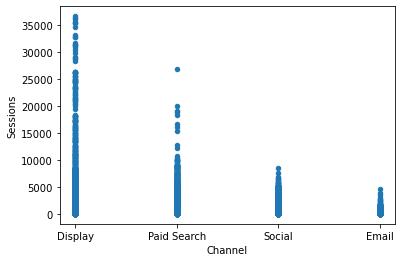

In [28]:
df[df["Channel"].isin(paid_channel)].plot(kind="scatter", x="Channel", y="Sessions")

<AxesSubplot:xlabel='New Users', ylabel='Sessions'>

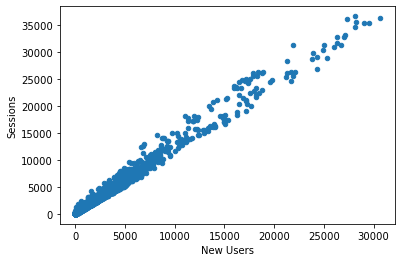

In [29]:
df[df["Channel"].isin(paid_channel)].plot(kind="scatter", x="New Users", y="Sessions")

<AxesSubplot:xlabel='Channel', ylabel='New Users'>

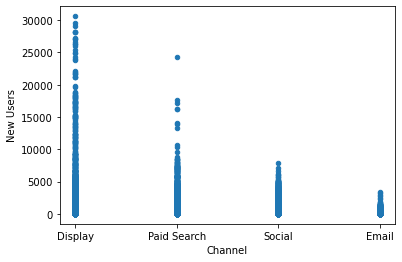

In [30]:
df[df["Channel"].isin(paid_channel)].plot(kind="scatter", x="Channel", y="New Users")

<AxesSubplot:xlabel='New Users', ylabel='Budget_perday'>

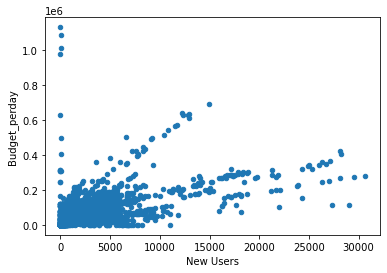

In [31]:
df[df["Channel"].isin(paid_channel)].plot(kind="scatter", y="Budget_perday", x="New Users")

<AxesSubplot:xlabel='Sessions', ylabel='Budget_perday'>

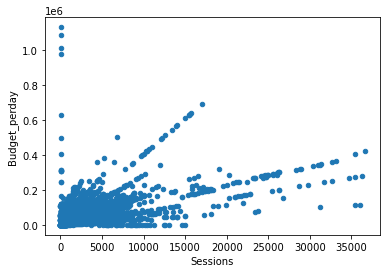

In [32]:
df[df["Channel"].isin(paid_channel)].plot(kind="scatter", y="Budget_perday", x="Sessions")

<AxesSubplot:>

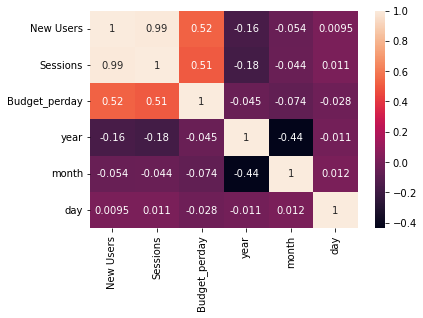

In [33]:
sns.heatmap(df.corr(), annot=True)

In [34]:
df.head() 

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1,2019-04-01,Display,0,97,1353.0,Aquaguard,2019,4,1
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
4,2019-04-02,Display,724,917,12896.0,Aquaguard,2019,4,2
6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
9,2019-04-03,Display,265,531,7462.0,Aquaguard,2019,4,3


In [35]:
paid_channel

['Paid Search', 'Social', 'Display', 'Email']

In [36]:
df = df[df["Channel"].isin(paid_channel)]

In [37]:
df.shape

(5456, 9)

In [38]:
df.Channel.value_counts()

Paid Search    1873
Social         1761
Display        1589
Email           233
Name: Channel, dtype: int64

In [39]:
q1 = df["Budget_perday"].quantile(0.25)
q3 = df["Budget_perday"].quantile(0.75)

In [40]:
q1, q3

(23631.75, 78570.75)

In [41]:
IQR = q3 - q1
min_strip = q1 - (1.5 * IQR)
max_strip = q3 + (1.5 * IQR)

In [42]:
min_strip 

-58776.75

In [43]:
max_strip

160979.25

In [44]:
ext_data = df[df["Budget_perday"]>max_strip]

In [45]:
ext_data.groupby("Channel")[["New Users", "Sessions"]].agg(["min","max","median","mean","count"])

New Users                                     Sessions         \
                  min    max   median          mean count      min    max   
Channel                                                                     
Display          1786  30602  13467.0  13860.291667   144     2414  36588   
Email               0   2704      0.0    176.500000    16       24   2970   
Paid Search      1038  17135   7191.0   7726.444444    27     1328  19042   
Social            917   6589   3185.0   3173.280000    75     1013   6806   

                                          
              median          mean count  
Channel                                   
Display      17075.5  17753.805556   144  
Email           24.0    212.625000    16  
Paid Search   8808.0   9239.518519    27  
Social        3403.0   3452.213333    75

In [46]:
ext_data.groupby("Channel").agg("count")

,Date,New Users,Sessions,Budget_perday,Product,year,month,day
Channel,,,,,,,,
Display,144,144,144,144,144,144,144,144
Email,16,16,16,16,16,16,16,16
Paid Search,27,27,27,27,27,27,27,27
Social,75,75,75,75,75,75,75,75


In [47]:
ext_data.shape

(262, 9)

In [48]:
ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True)

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
5799,2022-01-19,Paid Search,5768,7867,162084.0,Aquaguard,2022,1,19
6022,2022-02-26,Paid Search,5671,7119,162722.0,Aquaguard,2022,2,26
6028,2022-02-27,Paid Search,5719,7167,163820.0,Aquaguard,2022,2,27
6254,2022-04-12,Paid Search,8809,10112,164551.0,Aquaguard,2022,4,12
6072,2022-03-07,Paid Search,8085,9798,165412.0,Aquaguard,2022,3,7
5977,2022-02-18,Paid Search,5817,7264,166014.0,Aquaguard,2022,2,18
104,2019-04-25,Paid Search,1038,1328,166520.0,Aquaguard,2019,4,25
6470,2022-05-25,Paid Search,8496,9774,167057.0,Aquaguard,2022,5,25
6006,2022-02-23,Paid Search,5913,7336,167679.0,Aquaguard,2022,2,23
5875,2022-02-01,Paid Search,6082,7506,171575.0,Aquaguard,2022,2,1


In [49]:
ext_data[ext_data["Channel"]=="Email"].sort_values(by="Budget_perday", ascending=True)

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
4905,2021-08-09,Email,0,48,162979.0,Aquaguard,2021,8,9
3203,2020-11-07,Email,2704,2970,165731.0,Aquaguard,2020,11,7
4468,2021-05-26,Email,0,24,248603.0,Aquaguard,2021,5,26
4481,2021-05-28,Email,0,24,248603.0,Aquaguard,2021,5,28
5071,2021-09-06,Email,0,24,306872.0,Aquaguard,2021,9,6
5106,2021-09-12,Email,0,24,306872.0,Aquaguard,2021,9,12
5141,2021-09-18,Email,24,24,306872.0,Aquaguard,2021,9,18
5460,2021-11-16,Email,0,24,313313.0,Aquaguard,2021,11,16
5480,2021-11-20,Email,0,24,313313.0,Aquaguard,2021,11,20
5762,2022-01-13,Email,24,24,407625.0,Aquaguard,2022,1,13


In [50]:
df[df["Channel"]=="Email"]["Budget_perday"].value_counts()

0.0         16
121684.0     5
81492.0      4
21580.0      3
306872.0     3
            ..
34771.0      1
45085.0      1
39436.0      1
24417.0      1
56475.0      1
Name: Budget_perday, Length: 188, dtype: int64

In [51]:
df[df["Channel"]=="Email"]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
2168,2020-06-04,Email,24,24,0.0,Aquaguard,2020,6,4
2175,2020-06-05,Email,314,314,0.0,Aquaguard,2020,6,5
2182,2020-06-06,Email,459,459,0.0,Aquaguard,2020,6,6
2188,2020-06-07,Email,1158,1158,0.0,Aquaguard,2020,6,7
2194,2020-06-08,Email,1496,1496,0.0,Aquaguard,2020,6,8
...,...,...,...,...,...,...,...,...,...
5762,2022-01-13,Email,24,24,407625.0,Aquaguard,2022,1,13
5901,2022-02-06,Email,0,24,36125.0,Aquaguard,2022,2,6
5950,2022-02-14,Email,0,24,36125.0,Aquaguard,2022,2,14
5957,2022-02-15,Email,0,24,36125.0,Aquaguard,2022,2,15


In [52]:
ext_data[ext_data["Channel"]=="Social"].sort_values(by="Budget_perday", ascending=True)

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
4034,2021-03-10,Social,990,1183,161973.0,Aquaguard,2021,3,10
2561,2020-08-06,Social,3427,3765,163234.0,Aquaguard,2020,8,6
3801,2021-02-01,Social,917,1013,163536.0,Aquaguard,2021,2,1
3807,2021-02-02,Social,965,1014,163704.0,Aquaguard,2021,2,2
2468,2020-07-23,Social,4441,4899,166886.0,Aquaguard,2020,7,23
...,...,...,...,...,...,...,...,...,...
2886,2020-09-23,Social,4296,4657,264210.0,Aquaguard,2020,9,23
2879,2020-09-22,Social,4706,5140,291608.0,Aquaguard,2020,9,22
2872,2020-09-21,Social,6033,6395,362833.0,Aquaguard,2020,9,21
1644,2020-02-05,Social,4996,5213,384765.0,Aquaguard,2020,2,5


In [53]:
ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True).min()

Date             2019-04-23 00:00:00
Channel                  Paid Search
New Users                       1038
Sessions                        1328
Budget_perday               162084.0
Product                    Aquaguard
year                            2019
month                              1
day                                1
dtype: object

In [54]:
ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True).max()

Date             2022-05-25 00:00:00
Channel                  Paid Search
New Users                      17135
Sessions                       19042
Budget_perday               361151.0
Product                    Aquaguard
year                            2022
month                             12
day                               31
dtype: object

In [55]:
ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True).median()

C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/3157737620.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True).median()
C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/3157737620.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ext_data[ext_data["Channel"]=="Paid Search"].sort_values(by="Budget_perday", ascending=True).median()


New Users          7191.0
Sessions           8808.0
Budget_perday    178351.0
year               2022.0
month                 3.0
day                  18.0
dtype: float64

In [56]:
df = df[df["Channel"]!="Email"]

In [57]:
df.Channel.value_counts()

Paid Search    1873
Social         1761
Display        1589
Name: Channel, dtype: int64

In [58]:
df.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1,2019-04-01,Display,0,97,1353.0,Aquaguard,2019,4,1
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
4,2019-04-02,Display,724,917,12896.0,Aquaguard,2019,4,2
6,2019-04-02,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
9,2019-04-03,Display,265,531,7462.0,Aquaguard,2019,4,3


In [59]:
df.Channel.value_counts()

Paid Search    1873
Social         1761
Display        1589
Name: Channel, dtype: int64

In [60]:
df.shape

(5223, 9)

In [61]:
df[(df.Budget_perday == 0) & (df.Channel == 'Display') & (df.Sessions < 100)]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
5362,2021-10-27,Display,0,0,0.0,Aquaguard,2021,10,27
8986,2021-10-27,Display,0,0,0.0,Euroclean,2021,10,27
9000,2021-10-30,Display,0,0,0.0,Euroclean,2021,10,30
9043,2021-11-11,Display,27,0,0.0,Euroclean,2021,11,11


In [62]:
df[(df.Budget_perday == 0) & (df.Channel == 'Social') & (df.Sessions < 100)]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
39,2019-04-10,Social,24,24,0.0,Aquaguard,2019,4,10
70,2019-04-17,Social,24,24,0.0,Aquaguard,2019,4,17
111,2019-04-26,Social,48,48,0.0,Aquaguard,2019,4,26
158,2019-05-07,Social,24,24,0.0,Aquaguard,2019,5,7
186,2019-05-12,Social,24,24,0.0,Aquaguard,2019,5,12
235,2019-05-22,Social,48,48,0.0,Aquaguard,2019,5,22
258,2019-05-27,Social,24,24,0.0,Aquaguard,2019,5,27
296,2019-06-04,Social,24,24,0.0,Aquaguard,2019,6,4
312,2019-06-07,Social,24,24,0.0,Aquaguard,2019,6,7
327,2019-06-10,Social,24,24,0.0,Aquaguard,2019,6,10


In [63]:
df[(df.Budget_perday == 0) & (df.Channel == 'Paid Search') & (df.Sessions < 100)]

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1926,2020-04-04,Paid Search,0,24,0.0,Aquaguard,2020,4,4
1937,2020-04-08,Paid Search,0,48,0.0,Aquaguard,2020,4,8
1940,2020-04-09,Paid Search,0,96,0.0,Aquaguard,2020,4,9
1946,2020-04-11,Paid Search,0,96,0.0,Aquaguard,2020,4,11
1953,2020-04-13,Paid Search,24,72,0.0,Aquaguard,2020,4,13
1958,2020-04-14,Paid Search,0,72,0.0,Aquaguard,2020,4,14
1961,2020-04-15,Paid Search,0,48,0.0,Aquaguard,2020,4,15
1964,2020-04-16,Paid Search,0,48,0.0,Aquaguard,2020,4,16
1969,2020-04-17,Paid Search,0,48,0.0,Aquaguard,2020,4,17
1971,2020-04-18,Paid Search,0,96,0.0,Aquaguard,2020,4,18


In [64]:
df.reset_index(inplace=True, drop =True)

In [65]:
df.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
0,2019-04-01,Display,0,97,1353.0,Aquaguard,2019,4,1
1,2019-04-01,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
2,2019-04-02,Display,724,917,12896.0,Aquaguard,2019,4,2
3,2019-04-02,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
4,2019-04-03,Display,265,531,7462.0,Aquaguard,2019,4,3


In [66]:
df.drop("Date", axis=1, inplace=True)

In [67]:
df.head()

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
0,Display,0,97,1353.0,Aquaguard,2019,4,1
1,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
2,Display,724,917,12896.0,Aquaguard,2019,4,2
3,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
4,Display,265,531,7462.0,Aquaguard,2019,4,3


In [68]:
df.shape

(5223, 8)

In [69]:
drop_row = df[(df.Budget_perday == 0) & (df.Sessions > 100)]
drop_row

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
205,Social,314,338,0.0,Aquaguard,2019,7,4
211,Social,121,121,0.0,Aquaguard,2019,7,6
214,Social,193,217,0.0,Aquaguard,2019,7,7
217,Social,241,241,0.0,Aquaguard,2019,7,8
220,Social,169,169,0.0,Aquaguard,2019,7,9
...,...,...,...,...,...,...,...,...
652,Social,749,845,0.0,Aquaguard,2019,11,30
1015,Paid Search,24,120,0.0,Aquaguard,2020,4,2
1017,Paid Search,24,120,0.0,Aquaguard,2020,4,3
1023,Paid Search,48,120,0.0,Aquaguard,2020,4,6


In [70]:
drop_row[drop_row["Sessions"]>500]

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
307,Social,845,845,0.0,Aquaguard,2019,8,7
310,Social,676,724,0.0,Aquaguard,2019,8,8
367,Social,555,603,0.0,Aquaguard,2019,8,27
370,Social,507,531,0.0,Aquaguard,2019,8,28
382,Social,627,651,0.0,Aquaguard,2019,9,1
445,Social,482,579,0.0,Aquaguard,2019,9,22
622,Social,700,724,0.0,Aquaguard,2019,11,20
631,Social,580,652,0.0,Aquaguard,2019,11,23
637,Social,1013,1062,0.0,Aquaguard,2019,11,25
640,Social,627,724,0.0,Aquaguard,2019,11,26


In [71]:
df.drop(drop_row.index, axis=0, inplace=True)

In [72]:
df.shape

(5093, 8)

In [73]:
df[(df.Product == 'Aquaguard') & (df.Channel == 'Social') & (df.month).isin([4,5,6,7,8,9]) & (df.year == 2019)]


,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
20,Social,24,24,0.0,Aquaguard,2019,4,10
35,Social,24,24,0.0,Aquaguard,2019,4,17
54,Social,48,48,0.0,Aquaguard,2019,4,26
77,Social,24,24,0.0,Aquaguard,2019,5,7
88,Social,24,24,0.0,Aquaguard,2019,5,12
109,Social,48,48,0.0,Aquaguard,2019,5,22
120,Social,24,24,0.0,Aquaguard,2019,5,27
137,Social,24,24,0.0,Aquaguard,2019,6,4
144,Social,24,24,0.0,Aquaguard,2019,6,7
151,Social,24,24,0.0,Aquaguard,2019,6,10


In [74]:
df[(df.year==2020)& (df.Product=="Aquaguard") & (df.month==4) & (df.Channel=="Social")]

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1021,Social,0,24,0.0,Aquaguard,2020,4,5
1029,Social,0,24,0.0,Aquaguard,2020,4,9
1037,Social,0,24,0.0,Aquaguard,2020,4,13
1040,Social,0,24,0.0,Aquaguard,2020,4,14
1058,Social,0,24,0.0,Aquaguard,2020,4,23


In [75]:
df[(df.year==2020)& (df.Product=="Aquaguard") & (df.month==4) & (df.Channel=="Social")]

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
1021,Social,0,24,0.0,Aquaguard,2020,4,5
1029,Social,0,24,0.0,Aquaguard,2020,4,9
1037,Social,0,24,0.0,Aquaguard,2020,4,13
1040,Social,0,24,0.0,Aquaguard,2020,4,14
1058,Social,0,24,0.0,Aquaguard,2020,4,23


In [76]:
df.reset_index(inplace=True, drop=True)

In [77]:
df

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
0,Display,0,97,1353.0,Aquaguard,2019,4,1
1,Paid Search,72,97,12156.0,Aquaguard,2019,4,1
2,Display,724,917,12896.0,Aquaguard,2019,4,2
3,Paid Search,434,507,63564.0,Aquaguard,2019,4,2
4,Display,265,531,7462.0,Aquaguard,2019,4,3
...,...,...,...,...,...,...,...,...
5088,Social,1960,2170,67783.0,Euroclean,2022,5,29
5089,Paid Search,2252,3027,25548.0,Euroclean,2022,5,30
5090,Social,1860,2124,66342.0,Euroclean,2022,5,30
5091,Paid Search,3383,4049,34171.0,Euroclean,2022,5,31


In [78]:
df[(df.Product=="Aquaguard") & (df.Channel=="Display") & (df.year==2021) & (df.month.isin([11,12]))]

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
2592,Display,48,48,72959.0,Aquaguard,2021,11,8
2595,Display,0,48,72959.0,Aquaguard,2021,11,9
2600,Display,48,24,36480.0,Aquaguard,2021,11,11
2603,Display,0,48,72959.0,Aquaguard,2021,11,12
2606,Display,0,72,109439.0,Aquaguard,2021,11,13
2609,Display,0,24,36480.0,Aquaguard,2021,11,14
2612,Display,0,48,72959.0,Aquaguard,2021,11,15
2617,Display,0,48,72959.0,Aquaguard,2021,11,17
2638,Display,0,24,36480.0,Aquaguard,2021,11,27
2647,Display,0,24,11585.0,Aquaguard,2021,12,1


In [79]:
df.reset_index(inplace=True, drop=True)

In [80]:
df.drop(df[(df.Product=="Aquaguard") & (df.Channel=="Display") & (df.year==2021) & (df.month.isin([11,12]))].index, axis=0, inplace=True)

In [81]:
df.shape

(5068, 8)

In [82]:
df[(df.Product=="Euroclean") & (df.Channel=="Display") & (df.year==2021) & (df.month.isin([11,12]))]

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
4650,Display,0,9,26504.0,Euroclean,2021,11,1
4653,Display,0,36,106019.0,Euroclean,2021,11,2
4656,Display,0,9,26504.0,Euroclean,2021,11,3
4661,Display,0,9,26504.0,Euroclean,2021,11,5
4664,Display,0,18,53012.0,Euroclean,2021,11,6
4667,Display,18,9,26504.0,Euroclean,2021,11,7
4672,Display,0,18,53012.0,Euroclean,2021,11,9
4677,Display,27,0,0.0,Euroclean,2021,11,11
4704,Display,9,9,26504.0,Euroclean,2021,11,24
4711,Display,0,18,53012.0,Euroclean,2021,11,27


In [83]:
df.reset_index(inplace=True, drop=True)

In [84]:
df.drop(df[(df.Product=="Euroclean") & (df.Channel=="Display") & (df.year==2021) & (df.month.isin([11,12]))].index, inplace=True, axis=0)

In [85]:
df.shape

(5049, 8)

In [86]:
agg_8_d = df[(df.Channel == 'Display') & (df.year == 2019) & (df.month.isin([4,5,6,9,10,11])) & (df.Sessions.between(3000,15000))].groupby('month')['Budget_perday'].median()

In [87]:
agg_8_d.median()

88804.25

In [88]:
dis_8_1bud = df[(df.Channel == 'Display') & (df.year == 2019) & (df.month == 8)  & (df.Budget_perday < 10)]
dis_8_1bud

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
264,Display,7337,9027,1.0,Aquaguard,2019,8,1
267,Display,7771,10161,1.0,Aquaguard,2019,8,2
269,Display,11053,15036,1.0,Aquaguard,2019,8,3
272,Display,7747,10740,1.0,Aquaguard,2019,8,4
275,Display,6178,8616,1.0,Aquaguard,2019,8,5
277,Display,5575,8399,1.0,Aquaguard,2019,8,6
280,Display,3910,6637,1.0,Aquaguard,2019,8,7
282,Display,3355,6033,1.0,Aquaguard,2019,8,8
284,Display,3427,5671,1.0,Aquaguard,2019,8,9
286,Display,3934,6830,1.0,Aquaguard,2019,8,10


In [89]:
dis_4_1bud = df[(df.Channel == 'Display') & (df.year == 2020) & (df.month == 4)  & (df.Budget_perday < 100)]
dis_4_1bud

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
887,Display,48,651,1.0,Aquaguard,2020,4,1
888,Display,48,530,1.0,Aquaguard,2020,4,2
889,Display,72,458,1.0,Aquaguard,2020,4,3
890,Display,24,579,1.0,Aquaguard,2020,4,4
892,Display,48,434,1.0,Aquaguard,2020,4,5
894,Display,96,337,1.0,Aquaguard,2020,4,6
895,Display,0,530,1.0,Aquaguard,2020,4,7
896,Display,24,458,1.0,Aquaguard,2020,4,8
898,Display,48,337,1.0,Aquaguard,2020,4,9
901,Display,0,435,1.0,Aquaguard,2020,4,10


In [90]:
df.shape

(5049, 8)

In [91]:
df.reset_index(inplace=True, drop=True)

In [92]:
df.drop(df[(df.Channel == 'Display') & (df.year == 2020) & (df.month == 4)  & (df.Budget_perday < 100)].index, axis=0, inplace=True)

In [93]:
df.shape

(5019, 8)

In [94]:
dis_4_1bud['Per_session'] = dis_4_1bud['Sessions']/dis_4_1bud['Sessions'].sum()
dis_4_1bud

C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/2790970120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_4_1bud['Per_session'] = dis_4_1bud['Sessions']/dis_4_1bud['Sessions'].sum()


,Channel,New Users,Sessions,Budget_perday,Product,year,month,day,Per_session
887,Display,48,651,1.0,Aquaguard,2020,4,1,0.071272
888,Display,48,530,1.0,Aquaguard,2020,4,2,0.058025
889,Display,72,458,1.0,Aquaguard,2020,4,3,0.050142
890,Display,24,579,1.0,Aquaguard,2020,4,4,0.063390
892,Display,48,434,1.0,Aquaguard,2020,4,5,0.047515
894,Display,96,337,1.0,Aquaguard,2020,4,6,0.036895
895,Display,0,530,1.0,Aquaguard,2020,4,7,0.058025
896,Display,24,458,1.0,Aquaguard,2020,4,8,0.050142
898,Display,48,337,1.0,Aquaguard,2020,4,9,0.036895
901,Display,0,435,1.0,Aquaguard,2020,4,10,0.047624


In [95]:
dis_4_1bud['Budget_perday'] = dis_4_1bud['Per_session']*883413.99
dis_4_1bud

C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/4035598023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_4_1bud['Budget_perday'] = dis_4_1bud['Per_session']*883413.99


,Channel,New Users,Sessions,Budget_perday,Product,year,month,day,Per_session
887,Display,48,651,62962.832000,Aquaguard,2020,4,1,0.071272
888,Display,48,530,51260.062919,Aquaguard,2020,4,2,0.058025
889,Display,72,458,44296.431730,Aquaguard,2020,4,3,0.050142
890,Display,24,579,55999.200811,Aquaguard,2020,4,4,0.063390
892,Display,48,434,41975.221333,Aquaguard,2020,4,5,0.047515
894,Display,96,337,32593.662648,Aquaguard,2020,4,6,0.036895
895,Display,0,530,51260.062919,Aquaguard,2020,4,7,0.058025
896,Display,24,458,44296.431730,Aquaguard,2020,4,8,0.050142
898,Display,48,337,32593.662648,Aquaguard,2020,4,9,0.036895
901,Display,0,435,42071.938433,Aquaguard,2020,4,10,0.047624


In [96]:
dis_8_1bud['Per_Session'] = dis_8_1bud['Sessions'] / dis_8_1bud['Sessions'].sum()
dis_8_1bud

C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/714369951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_8_1bud['Per_Session'] = dis_8_1bud['Sessions'] / dis_8_1bud['Sessions'].sum()


,Channel,New Users,Sessions,Budget_perday,Product,year,month,day,Per_Session
264,Display,7337,9027,1.0,Aquaguard,2019,8,1,0.033764
267,Display,7771,10161,1.0,Aquaguard,2019,8,2,0.038005
269,Display,11053,15036,1.0,Aquaguard,2019,8,3,0.056239
272,Display,7747,10740,1.0,Aquaguard,2019,8,4,0.040171
275,Display,6178,8616,1.0,Aquaguard,2019,8,5,0.032226
277,Display,5575,8399,1.0,Aquaguard,2019,8,6,0.031415
280,Display,3910,6637,1.0,Aquaguard,2019,8,7,0.024824
282,Display,3355,6033,1.0,Aquaguard,2019,8,8,0.022565
284,Display,3427,5671,1.0,Aquaguard,2019,8,9,0.021211
286,Display,3934,6830,1.0,Aquaguard,2019,8,10,0.025546


In [97]:
dis_8_1bud['Budget_perday'] = dis_8_1bud['Per_Session']*4516566.52
dis_8_1bud

C:\Users\najmus.s\AppData\Local\Temp/ipykernel_11392/1996179324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_8_1bud['Budget_perday'] = dis_8_1bud['Per_Session']*4516566.52


,Channel,New Users,Sessions,Budget_perday,Product,year,month,day,Per_Session
264,Display,7337,9027,152496.076332,Aquaguard,2019,8,1,0.033764
267,Display,7771,10161,171653.110847,Aquaguard,2019,8,2,0.038005
269,Display,11053,15036,254008.087264,Aquaguard,2019,8,3,0.056239
272,Display,7747,10740,181434.348046,Aquaguard,2019,8,4,0.040171
275,Display,6178,8616,145552.918320,Aquaguard,2019,8,5,0.032226
277,Display,5575,8399,141887.066037,Aquaguard,2019,8,6,0.031415
280,Display,3910,6637,112121.021227,Aquaguard,2019,8,7,0.024824
282,Display,3355,6033,101917.450816,Aquaguard,2019,8,8,0.022565
284,Display,3427,5671,95802.065900,Aquaguard,2019,8,9,0.021211
286,Display,3934,6830,115381.433627,Aquaguard,2019,8,10,0.025546


In [98]:
dis_4_1bud.drop('Per_session', axis=1, inplace=True)
dis_8_1bud.drop('Per_Session', axis=1, inplace=True)

C:\Users\najmus.s\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
data = df.copy()

In [100]:
df = pd.concat([data, dis_4_1bud, dis_8_1bud], axis=0)
df

,Channel,New Users,Sessions,Budget_perday,Product,year,month,day
0,Display,0,97,1353.000000,Aquaguard,2019,4,1
1,Paid Search,72,97,12156.000000,Aquaguard,2019,4,1
2,Display,724,917,12896.000000,Aquaguard,2019,4,2
3,Paid Search,434,507,63564.000000,Aquaguard,2019,4,2
4,Display,265,531,7462.000000,Aquaguard,2019,4,3
...,...,...,...,...,...,...,...,...
323,Display,4851,7361,124351.791058,Aquaguard,2019,8,27
325,Display,6251,9123,154117.835868,Aquaguard,2019,8,28
327,Display,7119,10474,176940.722666,Aquaguard,2019,8,29
329,Display,6661,9171,154928.715636,Aquaguard,2019,8,30


In [101]:
df.drop('New Users', axis=1, inplace=True)

In [102]:
df.drop('Product', axis=1, inplace=True)

In [103]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()

In [104]:
df.head()

,Channel,Sessions,Budget_perday,year,month,day
0,Display,97,1353.0,2019,4,1
1,Paid Search,97,12156.0,2019,4,1
2,Display,917,12896.0,2019,4,2
3,Paid Search,507,63564.0,2019,4,2
4,Display,531,7462.0,2019,4,3


In [105]:
df.Channel.value_counts()

Paid Search    1869
Social         1635
Display        1576
Name: Channel, dtype: int64

In [106]:
add_data = df.copy()

In [107]:
df["Channel"] = le.fit_transform(df["Channel"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('mapping', le_name_mapping)

mapping {'Display': 0, 'Paid Search': 1, 'Social': 2}


In [108]:
df["year"] = le.fit_transform(df["year"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('mapping', le_name_mapping)

mapping {2019: 0, 2020: 1, 2021: 2, 2022: 3}


In [109]:
df.reset_index(inplace=True, drop=True)

In [110]:
X = df.drop("Sessions",axis=1)
y = df.pop("Sessions")

In [111]:
X.shape

(5080, 5)

In [112]:
y.shape

(5080,)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape, X_test.shape

((4064, 5), (1016, 5))

In [117]:
Y_train.shape, Y_test.shape

((4064,), (1016,))

In [118]:
scale_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
import pickle

In [121]:
pickle.dump(sc, open(r"C:\Users\najmus.s\Desktop\Jupyter-notebook\tcp\saved_model\sc.pkl","wb"))

In [192]:
##Linear Regression

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

lin_reg = LinearRegression()
model = lin_reg.fit(scale_train, Y_train)

y_predtrain = model.predict(scale_train)
y_predtest = model.predict(X_test)

RMSEtrain = mean_squared_error(Y_train, y_predtrain)**0.5
RMSEtest = mean_squared_error(Y_test, y_predtest)**0.5
r2_train = r2_score(Y_train, y_predtrain)
r2_test = r2_score(Y_test, y_predtest)
print( "RMSE for the training data is: ", RMSEtrain)
print ("RMSE for the testing data is: ", RMSEtest)
print ("R^2 value for training data is: ", r2_train)
print ("R^2 value for testing data is: ", r2_test) 

RMSE for the training data is:  2616.783910076703
RMSE for the testing data is:  2923.6117240858594
R^2 value for training data is:  0.4884352967085882
R^2 value for testing data is:  0.5216614019038928


In [193]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    #adjusted_r2 = 1-(1- r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    #print('adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# import machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

In [195]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2)

# Fitting the Random Forest Regression model to the data
model.fit(scale_train, Y_train)

# Predicting the target values of the test set
y_org = model.predict(scale_train)
y_pred = model.predict(X_test)

print("Metrics on Train Data")
regression_results(Y_train, y_org)

print("\nMetrics on Test Data")
regression_results(Y_test, y_pred)

Metrics on Train Data
Explained_variance:  0.9642
r2:  0.9642
MAE:  239.6398
MSE:  479506.7228
RMSE:  692.4642

Metrics on Test Data
Explained_variance:  0.8942
r2:  0.8941
MAE:  506.2927
MSE:  1891526.2574
RMSE:  1375.3277


In [196]:
from sklearn.model_selection import StratifiedKFold

In [197]:
X_scaled = sc.fit_transform(X)

In [198]:
validation= StratifiedKFold(n_splits=7, shuffle=True, random_state = 100)

lst_accu_stratified = []
  
for train_index, test_index in validation.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

C:\Users\najmus.s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(("The least populated class in y has only %d"


In [199]:
lst_accu_stratified

[0.8987310040763135,
 0.900097751996005,
 0.9125317553981457,
 0.8958981515288043,
 0.9237804227575597,
 0.9416005716930966,
 0.8654577805602567]

In [200]:
def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - Y_test)
    mape = 100 * np.mean(errors / Y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [201]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 6,8,10],
    'min_samples_split': [2,4,6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 600, 800, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [202]:
# Fit the grid search to the data
#grid_search.fit(scale_train, Y_train)
#grid_search.best_params_

In [203]:
model_hy = RandomForestRegressor(bootstrap=True, max_depth = 90, max_features ="log2", min_samples_leaf=2, min_samples_split=4, n_estimators = 200)

In [204]:
# Fitting the Random Forest Regression model to the data
model_hy.fit(scale_train, Y_train)

# Predicting the target values of the test set
y_org = model_hy.predict(scale_train)
y_pred = model_hy.predict(X_test)

print("Metrics on Train Data")
regression_results(Y_train, y_org)

print("\nMetrics on Test Data")
regression_results(Y_test, y_pred)

Metrics on Train Data
Explained_variance:  0.9614
r2:  0.9614
MAE:  302.5457
MSE:  516265.8377
RMSE:  718.5164

Metrics on Test Data
Explained_variance:  0.903
r2:  0.903
MAE:  561.2488
MSE:  1732823.8787
RMSE:  1316.3677


In [205]:
validation= StratifiedKFold(n_splits=10, shuffle=True, random_state = 100)

lst_accu_stratified = []
  
for train_index, test_index in validation.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model_hy.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

C:\Users\najmus.s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [206]:
lst_accu_stratified

[0.9861640457740349,
 0.961962390000711,
 0.9625232048752117,
 0.9701828150499295,
 0.9729347284865926,
 0.9848634021781839,
 0.9448442738268702,
 0.7925101792497757,
 0.9684880489957729,
 0.957275898177619]

In [207]:
!pip install xgboost
from xgboost import XGBRegressor,plot_importance
# create an xgboost regression model
# model = XGBRegressor()

# create an xgboost regression model
xgmodel = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.5, colsample_bytree=0.4)

# Fitting the XGBoost Regression model to the data
xgmodel.fit(scale_train, Y_train)

# Predicting the target values of the test set
y_org = xgmodel.predict(scale_train)
y_pred = xgmodel.predict(X_test)

print("Metrics on Train Data:")
regression_results(Y_train, y_org)

print("\nMetrics on Test Data:")
regression_results(Y_test, y_pred)

Metrics on Train Data:
Explained_variance:  0.9562
r2:  0.9562
MAE:  568.9453
MSE:  586944.0713
RMSE:  766.1228

Metrics on Test Data:
Explained_variance:  0.8402
r2:  0.8402
MAE:  1000.7786
MSE:  2856183.1301
RMSE:  1690.0246


# Analysis and Graph Creation on paid and no-paid channel toghther 

In [208]:
data = pd.read_csv(path)

In [209]:
data.head()

,Unnamed: 0,Date,Channel,New Users,Sessions,Budget_perday,Product
0,0,2019-04-01,Direct,48,48,0.0,Aquaguard
1,1,2019-04-01,Display,0,97,1353.0,Aquaguard
2,2,2019-04-01,Organic Search,24,48,0.0,Aquaguard
3,3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,4,2019-04-02,Display,724,917,12896.0,Aquaguard


In [210]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [211]:
data.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product
0,2019-04-01,Direct,48,48,0.0,Aquaguard
1,2019-04-01,Display,0,97,1353.0,Aquaguard
2,2019-04-01,Organic Search,24,48,0.0,Aquaguard
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,2019-04-02,Display,724,917,12896.0,Aquaguard


In [212]:
data["Date"] = pd.to_datetime(data["Date"])

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9790 non-null   datetime64[ns]
 1   Channel        9790 non-null   object        
 2   New Users      9790 non-null   int64         
 3   Sessions       9790 non-null   int64         
 4   Budget_perday  9790 non-null   float64       
 5   Product        9790 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 459.0+ KB


In [214]:
data.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product
0,2019-04-01,Direct,48,48,0.0,Aquaguard
1,2019-04-01,Display,0,97,1353.0,Aquaguard
2,2019-04-01,Organic Search,24,48,0.0,Aquaguard
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard
4,2019-04-02,Display,724,917,12896.0,Aquaguard


In [215]:
data["day"] = data["Date"].dt.day
data["month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

In [216]:
data.head()

,Date,Channel,New Users,Sessions,Budget_perday,Product,day,month,year
0,2019-04-01,Direct,48,48,0.0,Aquaguard,1,4,2019
1,2019-04-01,Display,0,97,1353.0,Aquaguard,1,4,2019
2,2019-04-01,Organic Search,24,48,0.0,Aquaguard,1,4,2019
3,2019-04-01,Paid Search,72,97,12156.0,Aquaguard,1,4,2019
4,2019-04-02,Display,724,917,12896.0,Aquaguard,2,4,2019


In [217]:
data.drop("Date", axis = 1, inplace = True)

In [218]:
data.columns

Index(['Channel', 'New Users', 'Sessions', 'Budget_perday', 'Product', 'day',
       'month', 'year'],
      dtype='object')

In [219]:
data[(data["Budget_perday"]!=0) & (data["Channel"].isin(["Direct", "Referral", "Organic Search"]))]

,Channel,New Users,Sessions,Budget_perday,Product,day,month,year


In [220]:
# taking all channel accept email
data1 = data[data["Channel"]!="Email"]

In [221]:
data1.Channel.value_counts()

Paid Search       1873
Social            1761
Display           1589
Direct            1571
Organic Search    1489
Others             913
Referral           361
Name: Channel, dtype: int64

In [222]:
non_paid = data1[data1["Channel"].isin(["Direct","Organic Search","Referral"])]

In [223]:
non_paid.Channel.value_counts()

Direct            1571
Organic Search    1489
Referral           361
Name: Channel, dtype: int64

In [224]:
non_paid[non_paid["Budget_perday"]!=0]

,Channel,New Users,Sessions,Budget_perday,Product,day,month,year


In [225]:
non_paid[(non_paid["Sessions"]>1000) & (non_paid["Budget_perday"]==0)]

,Channel,New Users,Sessions,Budget_perday,Product,day,month,year
800,Direct,3596,3596,0.0,Aquaguard,5,9,2019
3684,Direct,917,1207,0.0,Aquaguard,16,1,2021
3698,Direct,869,1110,0.0,Aquaguard,18,1,2021
3712,Direct,676,1038,0.0,Aquaguard,20,1,2021
3733,Direct,941,1376,0.0,Aquaguard,23,1,2021
3747,Direct,1062,1496,0.0,Aquaguard,25,1,2021
3754,Direct,1255,1617,0.0,Aquaguard,26,1,2021
3761,Direct,1038,1496,0.0,Aquaguard,27,1,2021
3768,Direct,990,1448,0.0,Aquaguard,28,1,2021
3775,Direct,990,1207,0.0,Aquaguard,29,1,2021


In [226]:
non_paid[(non_paid["Sessions"]>1000) & (non_paid["Budget_perday"]==0)].groupby("month").agg({"month":"count", "Sessions":["median", "mean"]})

month Sessions             
      count   median         mean
month                            
1        11   1352.0  1325.272727
2         5   1062.0  1091.000000
9         1   3596.0  3596.000000

In [227]:
add_data

,Channel,Sessions,Budget_perday,year,month,day
0,Display,97,1353.000000,2019,4,1
1,Paid Search,97,12156.000000,2019,4,1
2,Display,917,12896.000000,2019,4,2
3,Paid Search,507,63564.000000,2019,4,2
4,Display,531,7462.000000,2019,4,3
...,...,...,...,...,...,...
323,Display,7361,124351.791058,2019,8,27
325,Display,9123,154117.835868,2019,8,28
327,Display,10474,176940.722666,2019,8,29
329,Display,9171,154928.715636,2019,8,30


In [228]:
non_paid

,Channel,New Users,Sessions,Budget_perday,Product,day,month,year
0,Direct,48,48,0.0,Aquaguard,1,4,2019
2,Organic Search,24,48,0.0,Aquaguard,1,4,2019
5,Organic Search,121,121,0.0,Aquaguard,2,4,2019
7,Referral,24,24,0.0,Aquaguard,2,4,2019
8,Direct,24,24,0.0,Aquaguard,3,4,2019
...,...,...,...,...,...,...,...,...
9775,Direct,36,46,0.0,Euroclean,27,5,2022
9780,Organic Search,9,9,0.0,Euroclean,29,5,2022
9783,Direct,18,18,0.0,Euroclean,30,5,2022
9784,Organic Search,9,9,0.0,Euroclean,30,5,2022


In [229]:
non_paid.drop("New Users", axis = 1, inplace = True)

C:\Users\najmus.s\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [230]:
non_paid.reset_index(inplace=True, drop = True)

In [231]:
non_paid.head()

,Channel,Sessions,Budget_perday,Product,day,month,year
0,Direct,48,0.0,Aquaguard,1,4,2019
1,Organic Search,48,0.0,Aquaguard,1,4,2019
2,Organic Search,121,0.0,Aquaguard,2,4,2019
3,Referral,24,0.0,Aquaguard,2,4,2019
4,Direct,24,0.0,Aquaguard,3,4,2019


In [232]:
non_paid.drop("Product", axis=1 , inplace=True)

C:\Users\najmus.s\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [233]:
non_paid

,Channel,Sessions,Budget_perday,day,month,year
0,Direct,48,0.0,1,4,2019
1,Organic Search,48,0.0,1,4,2019
2,Organic Search,121,0.0,2,4,2019
3,Referral,24,0.0,2,4,2019
4,Direct,24,0.0,3,4,2019
...,...,...,...,...,...,...
3416,Direct,46,0.0,27,5,2022
3417,Organic Search,9,0.0,29,5,2022
3418,Direct,18,0.0,30,5,2022
3419,Organic Search,9,0.0,30,5,2022


In [234]:
concat = pd.concat([add_data,non_paid], axis = 0 )

In [235]:
concat

,Channel,Sessions,Budget_perday,year,month,day
0,Display,97,1353.0,2019,4,1
1,Paid Search,97,12156.0,2019,4,1
2,Display,917,12896.0,2019,4,2
3,Paid Search,507,63564.0,2019,4,2
4,Display,531,7462.0,2019,4,3
...,...,...,...,...,...,...
3416,Direct,46,0.0,2022,5,27
3417,Organic Search,9,0.0,2022,5,29
3418,Direct,18,0.0,2022,5,30
3419,Organic Search,9,0.0,2022,5,30


In [236]:
sc = StandardScaler()
le = LabelEncoder()

In [237]:
concat["Channel"]= le.fit_transform(concat["Channel"])

In [238]:
concat

,Channel,Sessions,Budget_perday,year,month,day
0,1,97,1353.0,2019,4,1
1,3,97,12156.0,2019,4,1
2,1,917,12896.0,2019,4,2
3,3,507,63564.0,2019,4,2
4,1,531,7462.0,2019,4,3
...,...,...,...,...,...,...
3416,0,46,0.0,2022,5,27
3417,2,9,0.0,2022,5,29
3418,0,18,0.0,2022,5,30
3419,2,9,0.0,2022,5,30


In [239]:
map_dict = dict(zip(le.classes_, le.transform(le.classes_)))

In [240]:
map_dict

{'Direct': 0,
 'Display': 1,
 'Organic Search': 2,
 'Paid Search': 3,
 'Referral': 4,
 'Social': 5}

In [241]:
concat["year"] = le.fit_transform(concat["year"])
year_dict = dict(zip(le.classes_, le.transform(le.classes_)))
year_dict

{2019: 0, 2020: 1, 2021: 2, 2022: 3}

In [242]:
concat

,Channel,Sessions,Budget_perday,year,month,day
0,1,97,1353.0,0,4,1
1,3,97,12156.0,0,4,1
2,1,917,12896.0,0,4,2
3,3,507,63564.0,0,4,2
4,1,531,7462.0,0,4,3
...,...,...,...,...,...,...
3416,0,46,0.0,3,5,27
3417,2,9,0.0,3,5,29
3418,0,18,0.0,3,5,30
3419,2,9,0.0,3,5,30


In [243]:
col_drop = list(concat.columns)

In [244]:
col_drop.remove("Sessions")

In [245]:
col_drop

['Channel', 'Budget_perday', 'year', 'month', 'day']

In [246]:
X1 = concat.drop("Sessions",axis = 1)
Y1 = concat.pop("Sessions")

In [247]:
X1.head()

,Channel,Budget_perday,year,month,day
0,1,1353.0,0,4,1
1,3,12156.0,0,4,1
2,1,12896.0,0,4,2
3,3,63564.0,0,4,2
4,1,7462.0,0,4,3


In [248]:
Y1.head()

0     97
1     97
2    917
3    507
4    531
Name: Sessions, dtype: int64

In [249]:
X1.shape, Y1.shape

((8501, 5), (8501,))

In [250]:
st = sc.fit_transform(X1)

In [251]:
st

array([[-0.77399421, -0.65199725, -1.66850297, -0.71985959, -1.68179987],
       [ 0.39272709, -0.4541087 , -1.66850297, -0.71985959, -1.68179987],
       [-0.77399421, -0.44055343, -1.66850297, -0.71985959, -1.56785882],
       ...,
       [-1.35735486, -0.6767814 ,  1.6431813 , -0.42859227,  1.62249047],
       [-0.19063356, -0.6767814 ,  1.6431813 , -0.42859227,  1.62249047],
       [-1.35735486, -0.6767814 ,  1.6431813 , -0.42859227,  1.73643152]])

In [252]:
train_feat, test_feat, train_label, test_label = train_test_split(X1, Y1, test_size = 0.2, random_state = 12)

In [308]:
test_feat.to_csv(r"C:\Users\najmus.s\Desktop\Jupyter-notebook\tcp\data\test.csv", index =False)

In [253]:
train_feat.shape, train_label.shape

((6800, 5), (6800,))

In [254]:
test_feat.shape, test_label.shape

((1701, 5), (1701,))

In [255]:
train_scaled = sc.fit_transform(train_feat)
test_scaled = sc.transform(test_feat)

In [256]:
test = test_feat.groupby(["year", "month"])["Channel"].value_counts()
test

year  month  Channel
0     4      3          10
             1           6
             0           3
             2           3
             5           1
                        ..
3     5      3          16
             5          12
             0           9
             2           5
             1           3
Name: Channel, Length: 209, dtype: int64

In [257]:
index = pd.MultiIndex.from_tuples(test.index)

In [258]:
g = pd.DataFrame(data=test, index = index)

In [259]:
g = g.reset_index()

In [260]:
g.columns

Index(['level_0', 'level_1', 'level_2', 'Channel'], dtype='object')

In [261]:
g.rename(columns={"level_0":"year", "level_1":"month", "level_2":"channel", "Channel":"counts"}, inplace=True)
g

,year,month,channel,counts
0,0,4,3,10
1,0,4,1,6
2,0,4,0,3
3,0,4,2,3
4,0,4,5,1
...,...,...,...,...
204,3,5,3,16
205,3,5,5,12
206,3,5,0,9
207,3,5,2,5


In [262]:
g.sort_values(by="counts", ascending=False)

,year,month,channel,counts
87,1,8,1,17
81,1,7,1,17
150,2,7,1,17
204,3,5,3,16
133,2,4,3,16
...,...,...,...,...
66,1,3,4,1
182,2,12,4,1
138,2,4,4,1
160,2,8,4,1


In [263]:
model1 = RandomForestRegressor(bootstrap=True, max_depth = 90, max_features ="log2", min_samples_leaf=2, min_samples_split=4, n_estimators = 200)

In [264]:
model1.fit(train_scaled, train_label)

RandomForestRegressor(max_depth=90, max_features='log2', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200)

In [265]:
model1.score(train_scaled, train_label)

0.9719966100783894

In [266]:
pred = model1.predict(test_scaled)

In [267]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1-(1- r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [306]:
test_scaled

array([[-0.77445282,  0.26172249, -1.66854728,  0.73251621, -0.66513479],
       [ 0.39233109,  1.27313442,  0.54101874,  0.44103571,  1.1598637 ],
       [-1.35784478, -0.6698661 ,  0.54101874,  1.02399671, -0.66513479],
       ...,
       [-0.19106087, -0.6698661 , -0.56376427, -1.01636678, -0.20888517],
       [-0.77445282,  0.38279176, -1.66854728,  1.02399671, -1.00732201],
       [-0.19106087, -0.6698661 ,  1.64580175, -1.01636678, -0.09482276]])

In [268]:
# Fitting the Random Forest Regression model to the data
model1.fit(train_scaled, train_label)

# Predicting the target values of the test set
y_org = model1.predict(train_scaled)
y_pred = model1.predict(test_scaled)

print("Metrics on Train Data")
regression_results(train_label, y_org)

print("\nMetrics on Test Data")
regression_results(test_label, y_pred)

Metrics on Train Data
Explained_variance:  0.9717
r2:  0.9717
adjusted_r2:  0.9717
MAE:  193.0846
MSE:  302113.0975
RMSE:  549.6482

Metrics on Test Data
Explained_variance:  0.8945
r2:  0.8943
adjusted_r2:  0.8942
MAE:  331.6967
MSE:  1048888.8575
RMSE:  1024.1528


In [309]:
y_pred

array([7601.10372704, 3790.54386237,   30.66091058, ...,   51.61334359,
       7500.09779924,   34.02684529])

In [310]:
from flask import jsonify

In [313]:
jb = {"pred":y_pred}

In [315]:
type(jb)

dict

In [269]:
prediction = pd.DataFrame(y_pred, columns =["pred"])
prediction

,pred
0,7601.103727
1,3790.543862
2,30.660911
3,1997.254969
4,43.938487
...,...
1696,134.871813
1697,1171.107191
1698,51.613344
1699,7500.097799


In [270]:
test_label.reset_index(inplace=True, drop=True)

In [271]:
prediction.reset_index(inplace=True, drop =True)

In [272]:
test_feat.reset_index(inplace = True, drop =True)

In [273]:
result = pd.concat([test_feat, test_label, prediction], axis =1 )

In [274]:
result

,Channel,Budget_perday,year,month,day,Sessions,pred
0,1,52016.0,0,9,10,4055,7601.103727
1,3,108489.0,2,8,26,3548,3790.543862
2,0,0.0,2,10,10,48,30.660911
3,1,54673.0,2,8,27,1906,1997.254969
4,2,0.0,1,4,13,48,43.938487
...,...,...,...,...,...,...,...
1696,0,0.0,2,3,5,121,134.871813
1697,3,39600.0,0,7,30,579,1171.107191
1698,2,0.0,1,3,14,24,51.613344
1699,1,58776.0,0,10,7,17256,7500.097799


In [275]:
result["absolute diff"] =np.abs(result["Sessions"] - result["pred"])

In [276]:
{'Direct': 0,
 'Display': 1,
 'Organic Search': 2,
 'Paid Search': 3,
 'Referral': 4,
 'Social': 5}

{'Direct': 0,
 'Display': 1,
 'Organic Search': 2,
 'Paid Search': 3,
 'Referral': 4,
 'Social': 5}

In [290]:
channel_dic = dict({'Direct': 0,
 'Display': 1,
 'Organic Search': 2,
 'Paid Search': 3,
 'Referral': 4,
 'Social': 5})

In [293]:
import pickle 

In [297]:
pickle.dump(channel_dic, open(r"C:\Users\najmus.s\Desktop\Jupyter-notebook\tcp\saved_model\channel.pkl","wb"))

In [303]:
channel_dic

{'Direct': 0,
 'Display': 1,
 'Organic Search': 2,
 'Paid Search': 3,
 'Referral': 4,
 'Social': 5}

In [301]:
yr_dict = {2019: 0, 2020: 1, 2021: 2, 2022: 3}
yr_dict

{2019: 0, 2020: 1, 2021: 2, 2022: 3}

In [304]:
pickle.dump(yr_dict, open(r"C:\Users\najmus.s\Desktop\Jupyter-notebook\tcp\saved_model\year.pkl","wb"))

In [279]:
result.head(20)

,Channel,Budget_perday,year,month,day,Sessions,pred,absolute diff
0,1,52016.0,0,9,10,4055,7601.103727,3546.103727
1,3,108489.0,2,8,26,3548,3790.543862,242.543862
2,0,0.0,2,10,10,48,30.660911,17.339089
3,1,54673.0,2,8,27,1906,1997.254969,91.254969
4,2,0.0,1,4,13,48,43.938487,4.061513
5,3,69045.0,2,11,27,3234,3889.979897,655.979897
6,0,0.0,2,4,17,155,82.214728,72.785272
7,2,0.0,0,6,15,97,162.164842,65.164842
8,0,0.0,0,11,5,72,73.310481,1.310481
9,1,11113.0,2,10,4,2344,1819.510849,524.489151


In [280]:
result.sort_values(by ="absolute diff", ascending=False)

,Channel,Budget_perday,year,month,day,Sessions,pred,absolute diff
1382,3,154792.0,3,2,26,26828,7708.151859,19119.848141
1462,1,116711.0,3,5,29,36010,18498.985583,17511.014417
886,1,75798.0,3,5,27,23387,8057.138474,15329.861526
18,1,61648.0,0,10,14,18100,7931.063427,10168.936573
1699,1,58776.0,0,10,7,17256,7500.097799,9755.902201
...,...,...,...,...,...,...,...,...
617,0,0.0,3,5,30,48,47.423250,0.576750
1110,3,49059.0,0,8,14,1713,1712.444212,0.555788
1145,2,0.0,2,2,19,27,27.550619,0.550619
1427,0,0.0,2,12,27,24,23.771301,0.228699


In [281]:
len(st)

8501

In [282]:
len(Y1)

8501

In [283]:
st

array([[-0.77399421, -0.65199725, -1.66850297, -0.71985959, -1.68179987],
       [ 0.39272709, -0.4541087 , -1.66850297, -0.71985959, -1.68179987],
       [-0.77399421, -0.44055343, -1.66850297, -0.71985959, -1.56785882],
       ...,
       [-1.35735486, -0.6767814 ,  1.6431813 , -0.42859227,  1.62249047],
       [-0.19063356, -0.6767814 ,  1.6431813 , -0.42859227,  1.62249047],
       [-1.35735486, -0.6767814 ,  1.6431813 , -0.42859227,  1.73643152]])

In [284]:
Y1.reset_index(inplace=True, drop =True)

In [285]:
Y1

0        97
1        97
2       917
3       507
4       531
       ... 
8496     46
8497      9
8498     18
8499      9
8500     36
Name: Sessions, Length: 8501, dtype: int64

In [286]:
validation= StratifiedKFold(n_splits=10, shuffle=True, random_state = 100)

lst_accu_stratified = []
  
for train_index, test_index in validation.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model_hy.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

C:\Users\najmus.s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [287]:
val = StratifiedKFold(n_splits=10, shuffle=True, random_state = 33)

In [288]:
acc = []
for train_ind, test_ind in val.split(X1,Y1):
    x_train_fold, x_test_fold = st[train_ind], st[test_ind]
    y_train_fold, y_test_fold = Y1[train_ind], Y1[test_ind]
    model1.fit(x_train_fold, y_train_fold)
    acc.append(model1.score(x_test_fold,y_test_fold))
    

C:\Users\najmus.s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [289]:
acc

[0.9408389609355462,
 0.9445658458964599,
 0.9549335319711876,
 0.9083018111552768,
 0.9397636422778959,
 0.9301106603537033,
 0.9216978674759184,
 0.8721639019761529,
 0.9420626264951231,
 0.9256562414189773]

In [305]:
pickle.dump(model1, open(r"C:\Users\najmus.s\Desktop\Jupyter-notebook\tcp\saved_model\model1.pkl","wb"))